# Projeto 1: Pegando dados da API do Banco Central

---------

## O que são APIs? 

* Formas de conectar sistemas.
* Seu código - banco de dados do Banco Central.
* Seu navegador - Servidor da globo e banco de dados de nóticias.


### A comunicação se dá através de métodos:

* GET
* POST

Geralmente utilizamos a biblioteca requests.

In [ ]:
import requests
import pandas as pd

In [ ]:
info_google = requests.get("https://www.google.com.br/") #não pode faltar o "https"

print(info_google)

### Respostas de um servidor

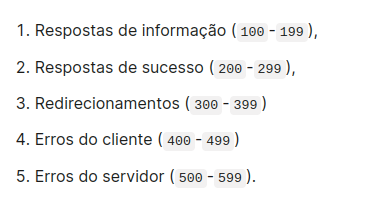

## API Banco Central

### A melhor forma de aprender sobre uma API é SEMPRE na documentação oficial.

O cara que criou se deu o trabalho de criar um texto explicando tudo nos mínimos detalhes para que a criação dele se torne útil. Valorize isso. 

Documentação Banco Central: https://dadosabertos.bcb.gov.br/organization/depec

Link útil pra aula: https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json

Localização dos códigos: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries



In [ ]:
#selic = 432
#ipca = 433
#PTAX (dólar) = 1

codigo = 432

url_banco_central = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'

In [ ]:
dados_selic = requests.get(url_banco_central)

### Json é uma estrutura de dados igual aos dicionários no Python.

Chave - Valor

In [ ]:
json_selic = dados_selic.json()

In [ ]:
df = pd.DataFrame(json_selic)
df

In [ ]:
df['data'] = pd.to_datetime(df['data'], format = '%d/%m/%Y')

In [ ]:
df = df.set_index('data')

In [ ]:
df['valor'] = df['valor'].astype(float)

In [ ]:
df = df.resample("M").last() #reorganizando os dados pra outra periodicidade.

In [ ]:
df.plot()